In [219]:
using Revise
using JLD2
using Plots
import Tensor_FixedSeedMC as TCIMC
using LinearAlgebra
using Statistics
using LaTeXStrings

## tolerance1e-4

In [220]:
JLD2.@load "tt_abo, tol0.0001.jld2" tt_abo
tt = tt_abo

┌ Warning: type TensorCrossInterpolation.TensorCI2{ComplexF64} does not exist in workspace; reconstructing
└ @ JLD2 /Users/sakurairihito/.julia/packages/JLD2/NKGUi/src/data/reconstructing_datatypes.jl:575


Reconstruct@TensorCI2{ComplexF64}(Any[[[Int64[]], [[100], [56], [31], [39], [37], [44], [38], [63], [36], [43], [40], [48], [45]]], [[[100], [1], [48], [23], [70], [83], [55], [92], [28], [39], [62], [34], [80]], [Int64[]]], [100, 100], Array{ComplexF64, 3}[[0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.001906978964396427 + 0.0im -0.00022671781892318055 + 0.0im -0.0010870987808463588 + 0.0im 0.004061222670990977 + 0.0im 0.010078547082145138 + 0.0im 0.00022202300925414933 + 0.0im 0.00897993629005522 + 0.0im 0.03478347607090233 + 0.0im -0.015530266798379985 + 0.0im 0.014800040752469677 + 0.0im -0.049144471224327024 + 0.0im -0.027686826874562365 + 0.0im -0.09819591003583003 + 0.0im -0.03512185414863277 + 0.0im 0.0 + 0.0im -0.0754238124889767 + 0.0im -0.10106141730362259 + 0.0im -0.09077142054571483 + 0.0im -0.08860435960286217 + 0.0im 0.0 + 0.

In [221]:
tt = tt.sitetensors

2-element Vector{Array{ComplexF64, 3}}:
 [0.0 + 0.0im 0.0 + 0.0im … 0.9537524280384099 + 0.0im 1.0 + 0.0im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.058597644491080854 - 0.0im 0.0 + 0.0im;;; 0.0 + 0.0im 0.0 + 0.0im … -0.0034723913652848198 + 0.0im 0.0 + 0.0im;;; … ;;; 0.0 + 0.0im 0.0 + 0.0im … 0.022341548004992308 + 0.0im 0.0 + 0.0im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.04422818028622927 - 0.0im 0.0 + 0.0im;;; 0.0 + 0.0im 0.0 + 0.0im … -0.09228899722237091 + 0.0im 0.0 + 0.0im]
 [15.386420947878483 + 0.0im 15.39414853148572 + 0.0im … 16.619030930633457 + 0.0im 16.635380930039968 + 0.0im; 4.717680015290708 + 0.0im 4.7410587866710765 + 0.0im … 6.8582860148859845 + 0.0im 6.878589514117582 + 0.0im; … ; 3.3557678875598334 + 0.0im 3.3778468204915697 + 0.0im … 5.241410746739684 + 0.0im 5.258679944883124 + 0.0im; 2.875262008882536 + 0.0im 2.89507661383101 + 0.0im … 4.570223532047358 + 0.0im 4.585308469682641 + 0.0im;;;]

In [222]:
price_matrix_tci = zeros(100, 100)
for i in 1:100
    for j in 1:100
        price_matrix_tci[i, j] = TCIMC.tt_evaluate(tt, [i, j])
    end
end
#res1_2 = tt_evaluate(tt, indexset)
price_matrix_tci
JLD2.@load "../MC/MCdata/price_matrix_asianbarrier_N_PATHS1000000.jld2" res
price_matrix_svd = res[1]
abs_err = abs.(price_matrix_svd .- price_matrix_tci)
maximum_abs_err = maximum(abs_err)
@show maximum_abs_err

maximum_abs_err = 0.01104995435197953


0.01104995435197953

In [223]:
@show size(tt[1])
@show size(tt[2])

size(tt[1]) = (1, 100, 13)
size(tt[2]) = (13, 100, 1)


(13, 100, 1)

In [224]:
tol = 1e-5
TCIMC.compress!(tt, tolerance=tol)

In [225]:
@show size(tt[1])
@show size(tt[2])

size(tt[1]) = (1, 100, 6)
size(tt[2]) = (6, 100, 1)


(6, 100, 1)

In [226]:
price_matrix_tci = zeros(100, 100)
for i in 1:100
    for j in 1:100
        price_matrix_tci[i, j] = TCIMC.tt_evaluate(tt, [i, j])
    end
end
#res1_2 = tt_evaluate(tt, indexset)
price_matrix_tci
JLD2.@load "../svd/price_matrix_asianbarrier.jld2" price_matrix
price_matrix_svd = price_matrix
abs_err = abs.(price_matrix_svd .- price_matrix_tci)
maximum_abs_err = maximum(abs_err)
@show maximum_abs_err

maximum_abs_err = 0.018117639759624993


0.018117639759624993

## tolerance10^{-6}

In [227]:
JLD2.@load "tt_abo, tol1.0e-6.jld2" tt_abo
tt_1e_6 = tt_abo
tt_1e_6 = tt_1e_6.sitetensors
price_matrix_tci = zeros(100, 100)
for i in 1:100
    for j in 1:100
        price_matrix_tci[i, j] = TCIMC.tt_evaluate(tt_1e_6, [i, j])
    end
end
#res1_2 = tt_evaluate(tt, indexset)
price_matrix_tci
JLD2.@load "../svd/price_matrix_asianbarrier.jld2" price_matrix
price_matrix_svd = price_matrix
abs_err = abs.(price_matrix_svd .- price_matrix_tci)
maximum_abs_err = maximum(abs_err)
@show maximum_abs_err

maximum_abs_err = 0.01431221002340699


┌ Warning: type TensorCrossInterpolation.TensorCI2{ComplexF64} does not exist in workspace; reconstructing
└ @ JLD2 /Users/sakurairihito/.julia/packages/JLD2/NKGUi/src/data/reconstructing_datatypes.jl:575


0.01431221002340699

In [228]:
@show size(tt_1e_6[1])
@show size(tt_1e_6[2])

size(tt_1e_6[1]) = (1, 100, 82)
size(tt_1e_6[2]) = (82, 100, 1)


(82, 100, 1)

In [229]:
tol = 1e-5
TCIMC.compress!(tt_1e_6, tolerance=tol)

In [230]:
@show size(tt_1e_6[1])
@show size(tt_1e_6[2])

size(tt_1e_6[1]) = (1, 100, 6)
size(tt_1e_6[2]) = (6, 100, 1)


(6, 100, 1)

In [231]:
price_matrix_tci = zeros(100, 100)
for i in 1:100
    for j in 1:100
        price_matrix_tci[i, j] = TCIMC.tt_evaluate(tt_1e_6, [i, j])
    end
end
#res1_2 = tt_evaluate(tt, indexset)
price_matrix_tci
JLD2.@load "../svd/price_matrix_asianbarrier.jld2" price_matrix
price_matrix_svd = price_matrix
abs_err = abs.(price_matrix_svd .- price_matrix_tci)
maximum_abs_err = maximum(abs_err)
@show maximum_abs_err

maximum_abs_err = 0.014287258115935675


0.014287258115935675

## tolerance1e-3

In [232]:
JLD2.@load "tt_abo, tol0.001.jld2" tt_abo
tt_1e_3 = tt_abo
tt_1e_3 = tt_1e_3.sitetensors
price_matrix_tci = zeros(100, 100)
for i in 1:100
    for j in 1:100
        price_matrix_tci[i, j] = TCIMC.tt_evaluate(tt_1e_3, [i, j])
    end
end
#res1_2 = tt_evaluate(tt, indexset)
price_matrix_tci
JLD2.@load "../svd/price_matrix_asianbarrier.jld2" price_matrix
price_matrix_svd = price_matrix
abs_err = abs.(price_matrix_svd .- price_matrix_tci)
maximum_abs_err = maximum(abs_err)
@show maximum_abs_err

maximum_abs_err = 0.009479263862740783


┌ Warning: type TensorCrossInterpolation.TensorCI2{ComplexF64} does not exist in workspace; reconstructing
└ @ JLD2 /Users/sakurairihito/.julia/packages/JLD2/NKGUi/src/data/reconstructing_datatypes.jl:575


0.009479263862740783

In [233]:
@show size(tt_1e_3[1])
@show size(tt_1e_3[2])
tol = 1e-5
TCIMC.compress!(tt_1e_3, tolerance=tol)
@show size(tt_1e_3[1])
@show size(tt_1e_3[2])

size(tt_1e_3[1]) = (1, 100, 3)
size(tt_1e_3[2]) = (3, 100, 1)
size(tt_1e_3[1]) = (1, 100, 3)
size(tt_1e_3[2]) = (3, 100, 1)


(3, 100, 1)

In [234]:
price_matrix_tci = zeros(100, 100)
for i in 1:100
    for j in 1:100
        price_matrix_tci[i, j] = TCIMC.tt_evaluate(tt_1e_3, [i, j])
    end
end
#res1_2 = tt_evaluate(tt, indexset)
price_matrix_tci
JLD2.@load "../svd/price_matrix_asianbarrier.jld2" price_matrix
price_matrix_svd = price_matrix
abs_err = abs.(price_matrix_svd .- price_matrix_tci)
maximum_abs_err = maximum(abs_err)
@show maximum_abs_err

maximum_abs_err = 0.009479263862750109


0.009479263862750109

## plots price

In [235]:
S0_values = range(90, stop=120, length=101)[1:end-1]
implied_vol_values = range(0.15, stop=0.25, length=101)[1:end-1]

0.15:0.001:0.249

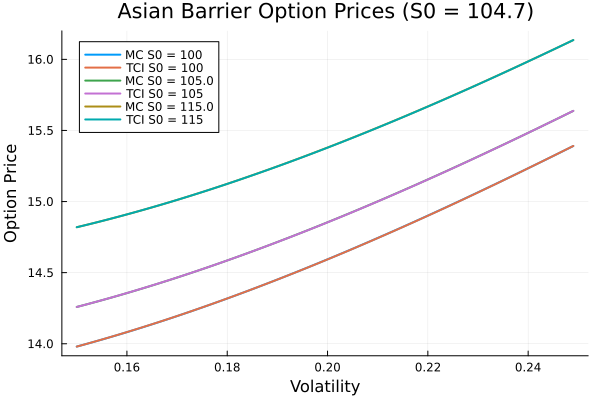

In [236]:
plot(implied_vol_values, price_matrix[95, :], xlabel="Volatility", ylabel="Option Price", 
     title="Asian Barrier Option Prices (S0 = 104.7)", label="MC S0 = 100", lw=2)
plot!(implied_vol_values, price_matrix_tci[95, :], label="TCI S0 = 100", lw=2)
plot!(implied_vol_values, price_matrix[96, :], label="MC S0 = 105.0", lw=2)
plot!(implied_vol_values, price_matrix_tci[96, :], label="TCI S0 = 105", lw=2)
plot!(implied_vol_values, price_matrix[98, :], label="MC S0 = 115.0", lw=2)
plot!(implied_vol_values, price_matrix_tci[98, :], label="TCI S0 = 115", lw=2)

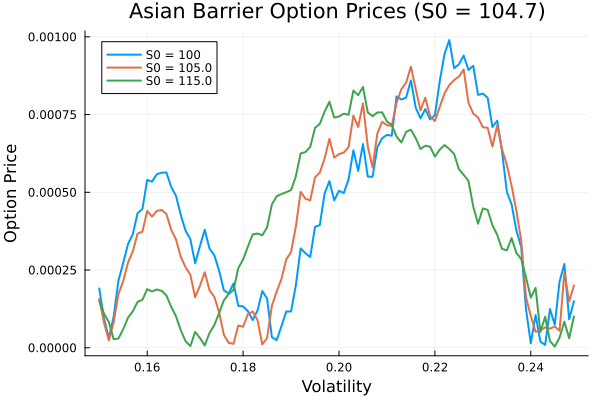

In [237]:
plot(implied_vol_values, abs.(price_matrix[95, :] - price_matrix_tci[95, :]), xlabel="Volatility", ylabel="Option Price", 
     title="Asian Barrier Option Prices (S0 = 104.7)", label="S0 = 100", lw=2)
plot!(implied_vol_values, abs.(price_matrix[96, :] - price_matrix_tci[96, :]), label="S0 = 105.0", lw=2)
plot!(implied_vol_values, abs.(price_matrix[98, :] - price_matrix_tci[98, :]), label="S0 = 115.0", lw=2)

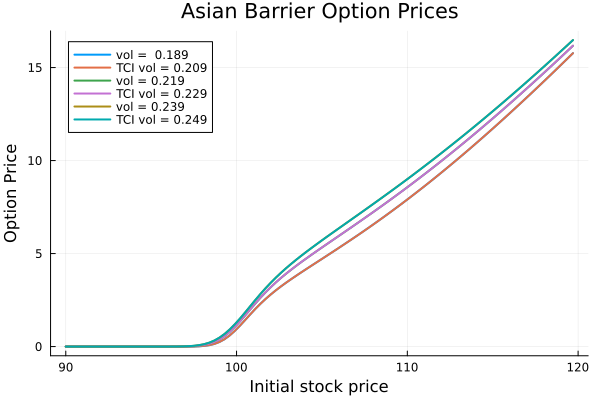

In [238]:
plot(S0_values, price_matrix[:, 40], xlabel="Initial stock price", ylabel="Option Price", 
     title="Asian Barrier Option Prices", label="vol =  0.189", lw=2)
plot!(S0_values, price_matrix_tci[:, 40], label="TCI vol = 0.209", lw=2)
plot!(S0_values, price_matrix[:, 70], label="vol = 0.219", lw=2)
plot!(S0_values, price_matrix_tci[:, 70], label="TCI vol = 0.229", lw=2)
plot!(S0_values, price_matrix[:, 90], label="vol = 0.239", lw=2)
plot!(S0_values, price_matrix_tci[:, 90], label="TCI vol = 0.249", lw=2)

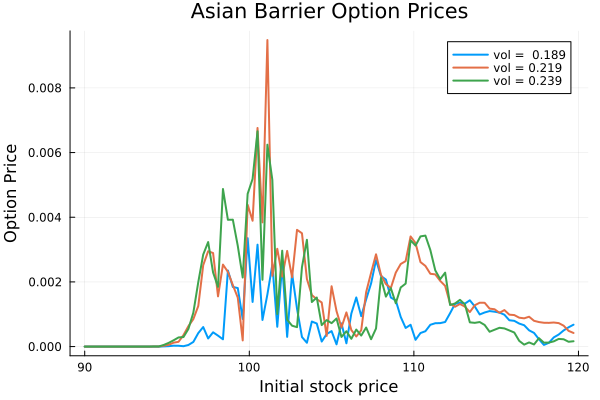

In [239]:
plot(S0_values, abs.(price_matrix[:, 40] .- price_matrix_tci[:, 40]), xlabel="Initial stock price", ylabel="Option Price", 
     title="Asian Barrier Option Prices", label="vol =  0.189", lw=2)
plot!(S0_values, abs.(price_matrix[:, 70] .- price_matrix_tci[:, 70]), label="vol = 0.219", lw=2)
plot!(S0_values, abs.(price_matrix[:, 90] .- price_matrix_tci[:, 90]), label="vol = 0.239", lw=2)

In [240]:
using JLD2
JLD2.@load "../MC/MCdata/price_matrix_asianbarrier_N_PATHS50000000.jld2" res
true_vals = res[1]

100-element Vector{Any}:
  0.0
  7.3066800509973096
  0.0
 13.172578842679838
  3.895564162594208
  9.282700454297311
  0.3729402654334533
  0.0026272220437503734
 12.290172129849152
  8.139546209105534
  ⋮
  3.499886669214271
  0.3027069566361018
  7.039978264292636
 12.265854488127252
  7.931150515344597
  3.8020564174262415
  0.1253142981532405
 16.223960804609685
  0.0041616458707820205

In [241]:
random_combinations = TCIMC.generate_random_combinations(100, 2, 100);
tt_res = []
for i in random_combinations
    push!(tt_res, TCIMC.tt_evaluate(tt, i))
end

@show mean(abs.(tt_res .- true_vals))
@show std(abs.(tt_res .- true_vals))
@show maximum(abs.(tt_res .- true_vals))
@show findmax(abs.(tt_res .- true_vals))
@show random_combinations[findmax(abs.(tt_res .- true_vals))[2]]

mean(abs.(tt_res .- true_vals)) = 0.0027167464207662434
std(abs.(tt_res .- true_vals)) = 0.0027034065789310778
maximum(abs.(tt_res .- true_vals)) = 0.010076940413875857
findmax(abs.(tt_res .- true_vals)) = (0.010076940413875857, 76)
random_combinations[(findmax(abs.(tt_res .- true_vals)))[2]] = [40, 74]


2-element Vector{Int64}:
 40
 74

mean(abs.(tt_res .- true_vals)) = 0.002246090981196773
std(abs.(tt_res .- true_vals)) = 0.001971508328857425
maximum(abs.(tt_res .- true_vals)) = 0.005962728027689934
findmax(abs.(tt_res .- true_vals)) = (0.005962728027689934, 4)
random_combinations[(findmax(abs.(tt_res .- true_vals)))[2]] = [87, 85]

## greeks

### vega

In [244]:
function evaluate_options(random_combinations, tt_option)
    result_hako = []
    result_time = []
    for i in random_combinations
        #@show i
        time_inner = @elapsed begin
            inner_ = TCIMC.tt_evaluate(tt_option, i)
            result = inner_
        end
        push!(result_hako, result)
        push!(result_time, time_inner)
    end
    return result_hako, result_time
end

evaluate_options (generic function with 2 methods)

In [245]:
combinations = [[i, 2] for i in 1:100]
diff_mat = TCIMC.diff_matrix(100, 0.001);
ttnew_grad_sigma = TCIMC.grad_tt(tt, 2, diff_mat);
res_grad_sigma, time = evaluate_options(combinations, ttnew_grad_sigma);

In [246]:
S0_values = range(90, stop=120, length=101)[1:end-1]
implied_vol_values = range(0.15, stop=0.25, length=101)[1:end-1]

0.15:0.001:0.249

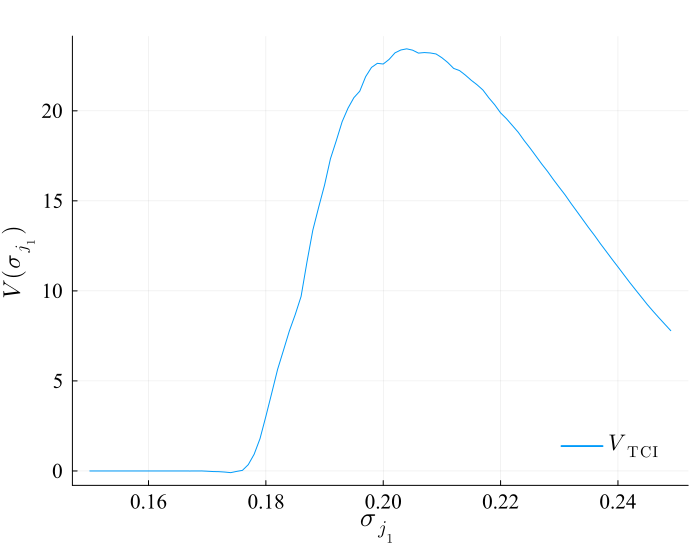

In [248]:
p_nume_ = plot(
        #yaxis=:log,
        title = " ",
        titlefont = "Times New Roman", 
        xlabel=L"\sigma_{j_1}^{}", 
        ylabel= L"V(\sigma_{j_1}^{} ) ",
        legend = :bottomright,
        guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        titlefontsize = 16,
        legendfontsize = 15,
        tickfontsize = 13,
        xlabelfontsize = 18,
        ylabelfontsize = 16,
        xguidefont = 15,
        yguidefont = 15,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
        fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        #left_margin=Plots.Measures.Length(:mm, 10),
        #top_margin=Plots.Measures.Length(:mm, 3.0),
        #bottom_margin=Plots.Measures.Length(:mm, 4.0),
        #right_margin=Plots.Measures.Length(:mm, 3.0),
        size = (700, 550)
        )

        plot!(
            p_nume_,
            implied_vol_values,
            res_grad_sigma,
            #markershape = :circle,
            label = L"V_{\mathrm{TCI}}",
            #markersize = 3.5,
        )
        

p_nume_